<a href="https://colab.research.google.com/github/hariharihi/Data-Science-for-Everybody/blob/main/Day05/5_4_%ED%8C%8C%EC%9D%B4%EC%8D%AC_EDA_%EB%B2%94%EC%A3%BC%ED%98%95_%EB%B3%80%EC%88%98_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(pd.__version__)
print(sns.__version__)

1.1.5
0.11.2


In [ ]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

## 데이터셋 불러오기

In [ ]:
# mpg 데이터셋을 불러옵니다.
# df

df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 데이터셋 일부만 가져오기

In [ ]:
# head
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500


In [ ]:
# tail

df.tail(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 요약하기

In [ ]:
df.info()

#type이 object인 'origin'과 'name'을 범주형 데이터로 쓸 수 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##  결측치 보기

In [ ]:
df.isnull()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## 기술통계

In [ ]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기
  #top = 최빈값 / freq = 최빈값에 대한 빈도수
df.describe()
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [ ]:
# nunique 값 구하기 

df.nunique()
  #model_year와 cylinders는 수치형이지만 범주형 데이터에 가까운 것을 확인

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

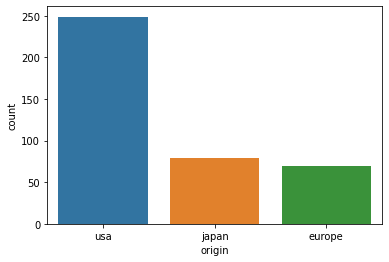

In [ ]:
# countplot 으로 origin 빈도수 시각화 하기

sns.countplot(data=df, x="origin")
#sns.countplot(data=df, y="origin")

### 1개 변수의 빈도수

In [ ]:
# origin 의 빈도수 구하기

df["origin"]
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 2개 이상의 변수에 대한 빈도수

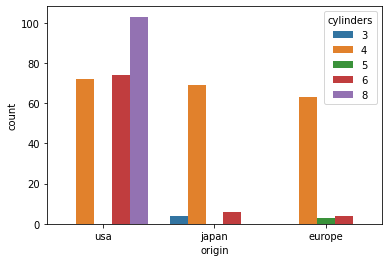

In [ ]:
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders를 다른 색상으로 표현하기
  #hue 옵션 사용 가능

sns.countplot(data=df, x="origin", hue="cylinders")

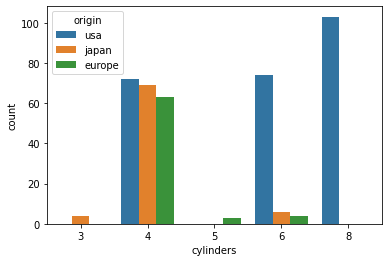

In [ ]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin을 다른 색상으로 표현하기

sns.countplot(data=df, x="cylinders", hue="origin")

In [ ]:
# pd.crosstab 으로 시각화한 값 직접 구하기
  #1개의 변수 값 구할 때는 df[""].value_counts() 사용
  #2개 이상의 변수 값 구할 때는 pd.crosstab(df["index"], df["columns"]) 사용

pd.crosstab(df["origin"], df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


### 범주형 vs 수치형 변수

In [ ]:
sns.barplot?

#기본값은 평균으로 되어 있음
  #sns.barplot(estimator=np.mean)
#합계로도 변경 가능
  #sns.barplot(estimator=np.sum)

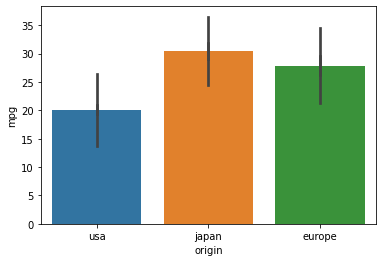

In [ ]:
# barplot 으로 origin 별 mpg 값 구하기
  #기본적으로 평균값(mean)을 보여준다
  #기본적으로 신뢰구간(ci)를 보여준다 => 중간선
    #기본값은 ci=95이다
    #ci="sd"로 표준편차를 확인할 수 있다 (standard deviation)
    #ci=None으로 계산하는 데 걸리는 시간을 절약할 수 있다 => 웬만하면 None으로 설정

sns.barplot(data=df, x="origin", y="mpg")
  #sns.barplot(data=df, x="origin", y="mpg", estimator=np.mean) 
  #sns.barplot(data=df, x="origin", y="mpg", estimator=np.sum)
sns.barplot(data=df, x="origin", y="mpg", ci="sd")
#sns.barplot(data=df, x="origin", y="mpg", ci=None)

### groupby 를 통한 연산

In [ ]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
  #빈도수를 구하는 것은: df[].value_counts() OR pd.crosstab(df[], df[])
  #평균을 구하는 것은: df.groupby()[].mean()
  #groupby는 <시리즈> 형태로 반환

df.groupby("origin")["mpg"].mean()
  #왜 앞에는 소괄호()가 오고, 뒤에는 대괄호[]가 오는 것인가?
    #소괄호(): 함수를 호출하는 용도
    #대괄호(): 컬럼(열)을 인덱싱하기위한 용도
    #.mean(): Python에서는 .method() 식으로 함수들을 chaining 해줄 수 있다

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

### pivot table을 통한 연산

In [ ]:
# pivot_table 로 같은 값 구하기
  #groupby를 추상화한 기능 => 직관적
  #기본적으로 평균값으로 나온다
  #groupby와 달리 <데이터프레임> 형태로 반환
#pd.pivot_table??
'''
  grouped = data.groupby(keys, observed=observed)
  agged = grouped.agg(aggfunc)
'''

pd.pivot_table(data=df, index="origin", values="mpg")
pd.pivot_table(data=df, index="origin", values="mpg", aggfunc="mean")
  #컬럼은 따로 지정하지 않았음

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


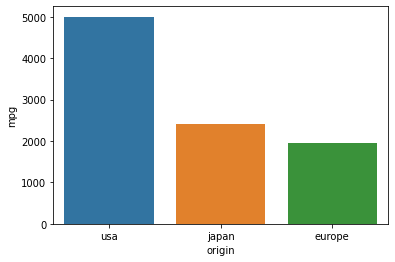

In [ ]:
# barplot 으로 합계 값 구하기

#기본 평균값
#sns.barplot(data=df, x="origin", y="mpg") 

#합계값
  #매출데이터일 때 유용
sns.barplot(data=df, x="origin", y="mpg", estimator=np.sum, ci=None) 

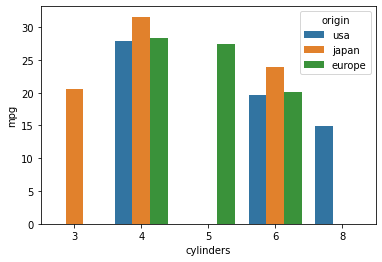

In [ ]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기

#sns.barplot(data=df, x="cylinders", y="mpg", ci=None)
sns.barplot(data=df, x="cylinders", y="mpg", ci=None, hue="origin")

In [ ]:
# groupby 를 통해 위 시각화에 대한 값을 구하기
  #df.groupby()[].mean()

#df.groupby("cylinders", "origin")
  #ValueError 발생! (by, axis)
    #axis는 행과 열을 의미
    #origin을 axis로 인식했기 때문에 오류 발생
    #origin을 axis가 아닌 by로 넘겨주기 위해서는 list형태로 묶어야 한다

df.groupby(["cylinders", "origin"])["mpg"].mean()

#마지막 index 값("origin")을 컬럼화한다
df.groupby(["cylinders", "origin"])["mpg"].mean().unstack()
  #Nan(Not a Number): 결측치

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [ ]:
# pivot_table 를 통해 위 시각화에 대한 값을 구하기 
  #groupby와 똑같이 시각화할 수 있다
  #pivot과 pivot_table의 차이는? 후자는 연산을 할 수 있다!

#pd.pivot_table(data=df, index="cylinders", columns="origin")
pd.pivot_table(data=df, index="cylinders", columns="origin", values="mpg")

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


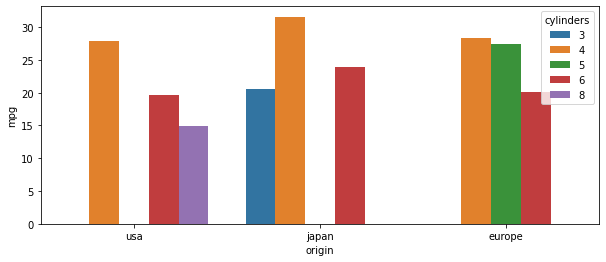

In [ ]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화

#범례사이즈 조정하기
plt.figure(figsize=(10,4))

#columns => x axis (범주형 값)
#values => y axis (수치형 값)
#index => hue
sns.barplot(data=df, x="origin", y="mpg", hue="cylinders", ci=None)

### boxplot과 사분위수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

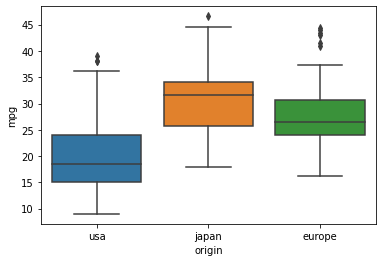

In [ ]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
  #평균값만 볼 수 있다는 barplot의 단점을 보완
  #BUT 수염 안의 값이나, 박스 안의 값을 볼 수 없다는 단점 존재!
  #보완 => <boxenplot>
  #이상치를 제외한 최소/최대값

sns.boxplot(data=df, x="origin", y="mpg")

In [ ]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
  #관측치에 해당하는 최소/최대값 <-> boxplot

origin_desc = df.groupby("origin")["mpg"].describe()
origin_desc

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [ ]:
europe = origin_desc.loc["europe"]

In [ ]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기

# Q3
Q3 = europe["75%"]
Q3

# Q1
Q1 = europe["25%"]
Q1

# IQR
IQR = Q3 - Q1
IQR

# OUT_MAX: 해당값을 초과하면 이상치로 분류
OUT_MAX = Q3 + (1.5 * IQR)
OUT_MAX

# OUT_MIN: 해당값에 미달하면 이상치로 분류
OUT_MIN = Q1 - (1.5 * IQR)
OUT_MIN

# 이상치 값의 기준
OUT_MIN, OUT_MAX

(14.025000000000002, 40.625)

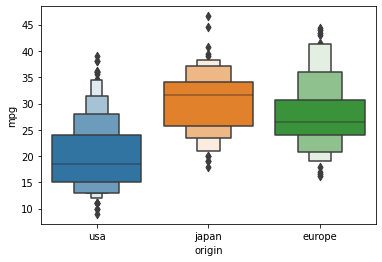

In [ ]:
# boxenplot 그리기
  #수염 안의 값이나, 박스 안의 값을 볼 수 없다는 boxplot의 단점 보완
  
sns.boxenplot(data=df, x="origin", y="mpg")

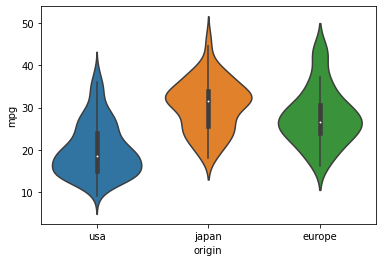

In [ ]:
# violinplot 그리기
  #kdeplot을 마주보고 그린 것
  #boxenplot보다 좀 더 자세하게 보여준다
sns.violinplot(data=df, x="origin", y="mpg")

### 산점도를 통한 범주형 데이터 표현

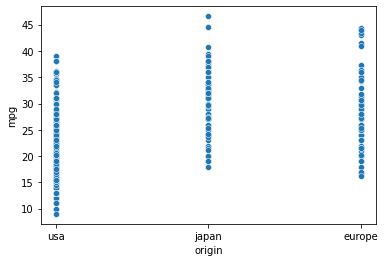

In [ ]:
# scatterplot 으로 범주형 변수 그리기
  #scatterplot은 범주형 데이터를 표현하는 데 적합하지 않음! => 겹쳐서 찍히는 게 많음
  #보완 => <stripplot>

sns.scatterplot(data=df, x="origin", y="mpg")

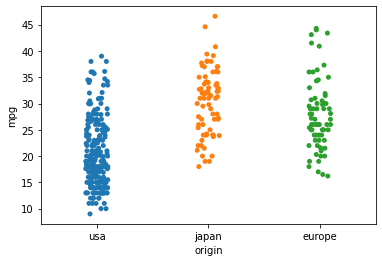

In [ ]:
# stripplot
  #데이터가 겹치는 scatterplot의 단점 보완!
    #옆으로 흩뿌리기 -> 밀도를 알 수 있다
  #BUT 그래도 겹치는 문제 발생!
  #보완 => <swarmplot>

sns.stripplot(data=df, x="origin", y="mpg")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


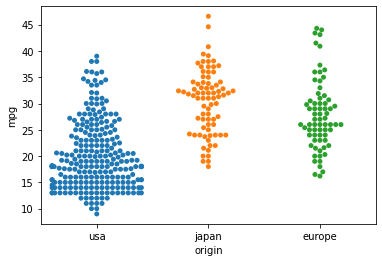

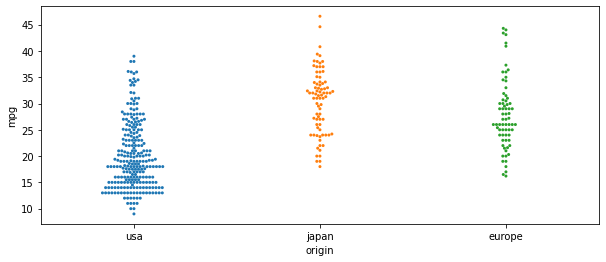

In [ ]:
# swarmplot
  # <violinplot>과 유사한 모양을 확인할 수 있다

sns.swarmplot(data=df, x="origin", y="mpg")
  #warning message! 데이터 보이지 않을 수 있다
    #UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot
  
#방법1: 그래프 크기 키우기
plt.figure(figsize=(10, 4))
#sns.swarmplot(data=df, x="origin", y="mpg")

#방법2: 마커(점)의 크기 줄이기
sns.swarmplot(data=df, x="origin", y="mpg", size=3)

### catplot을 통한 범주형 데이터의 서브플롯 시각화
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500">

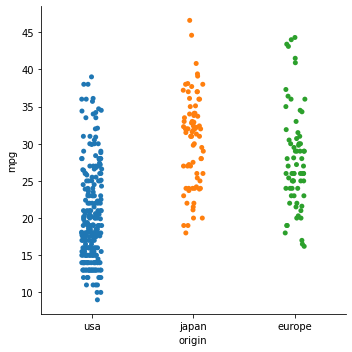

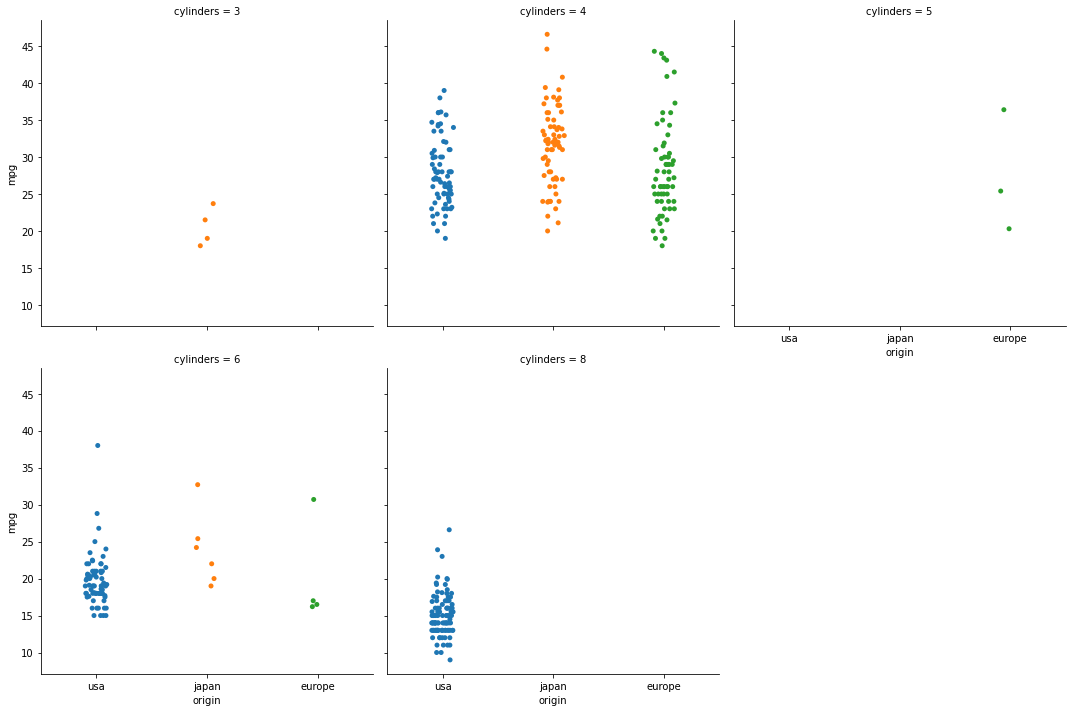

In [ ]:
# catplot
  #x축에는 범주형 데이터 / y축에는 수치형 데이터
  #기본형은 <stripplot>

#기본형
sns.catplot(data=df, x="origin", y="mpg", kind="strip") 

#서브플롯 추가
#sns.catplot(data=df, x="origin", y="mpg", col="cylinders")
#한줄에 3개만 그리기
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3)

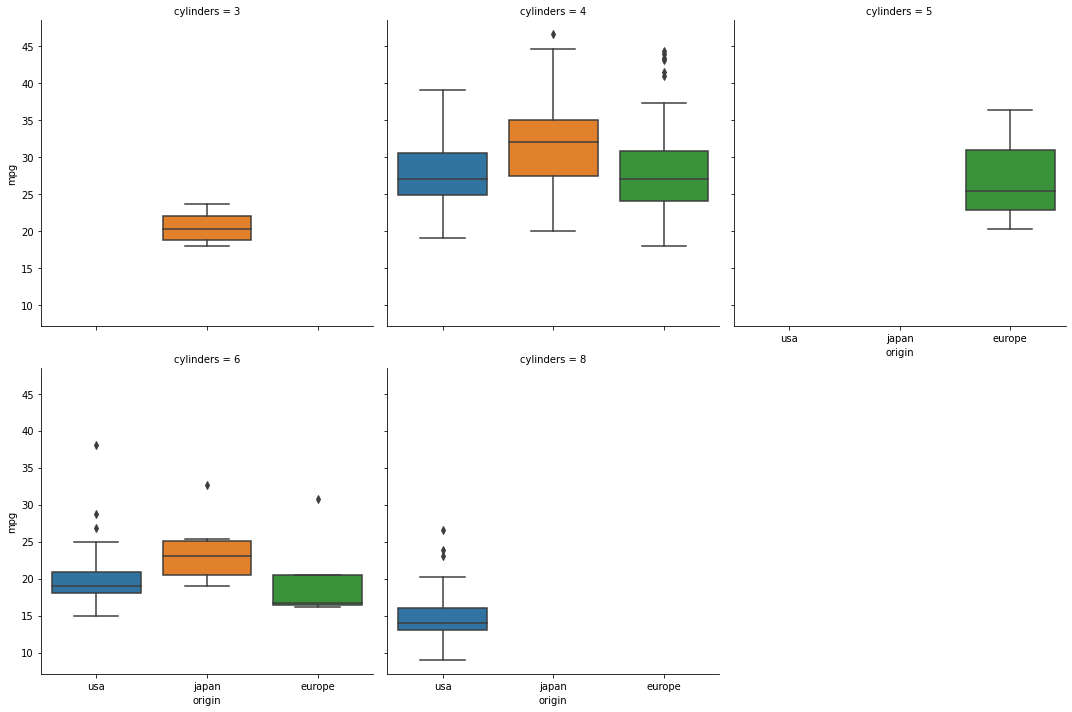

In [ ]:
# catplot 으로 boxplot그리기

sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="box")

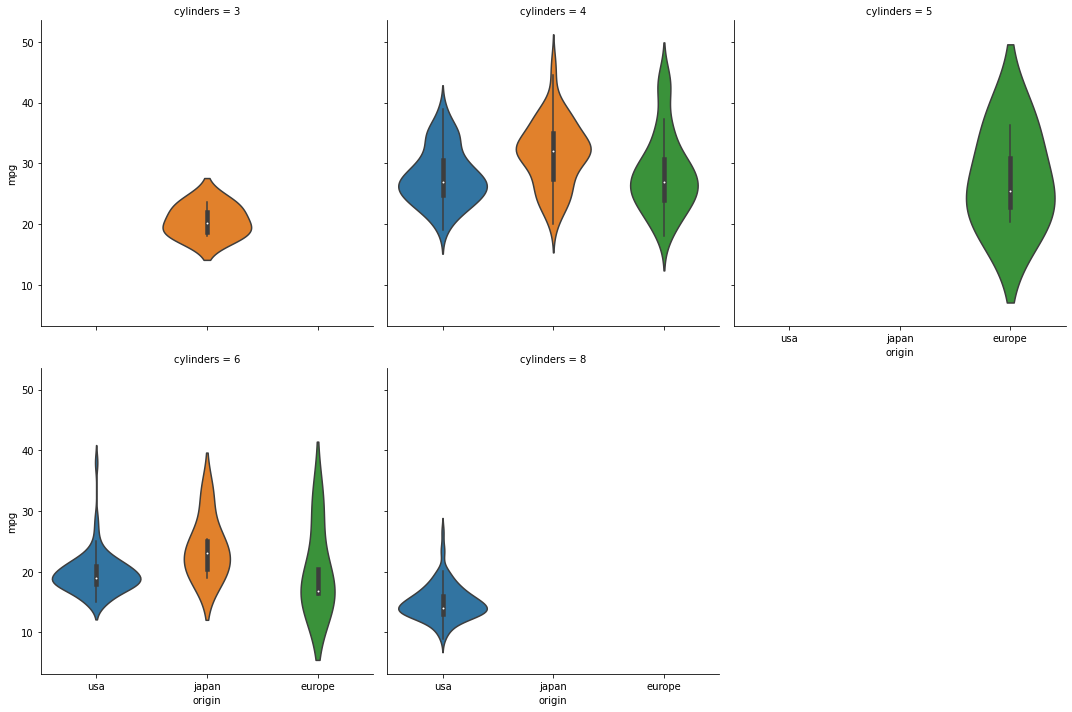

In [ ]:
# catplot 으로 violinplot그리기

sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="violin")

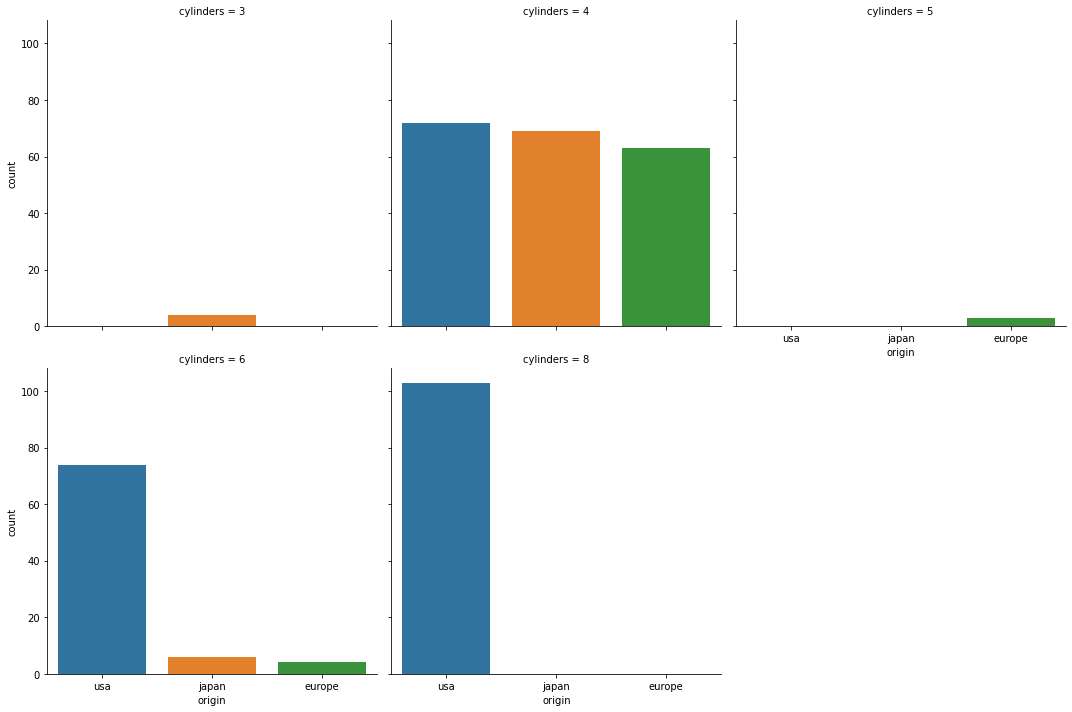

In [ ]:
# catplot 으로 countplot그리기
  #countplot은 다른 서브플롯과 달리, x나 y 중 1개 값만 사용해야 함
sns.catplot(data=df, x="origin", col="cylinders", col_wrap=3, kind="count")

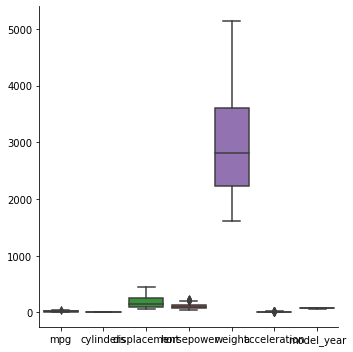

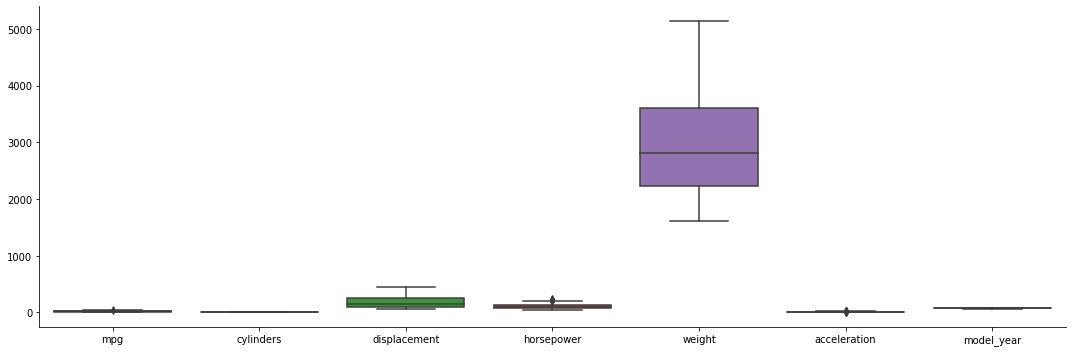

In [ ]:
# catplot 으로 boxplot그리기
# df 전체를 넣고 시각화 하기

#수치형 변수만 가지고 오게 된다!
sns.catplot(data=df, kind="box")

#catplot은 바깥이 아닌 함수 안에서 크기를 지정해야 한다
sns.catplot(data=df, kind="box", aspect=3)

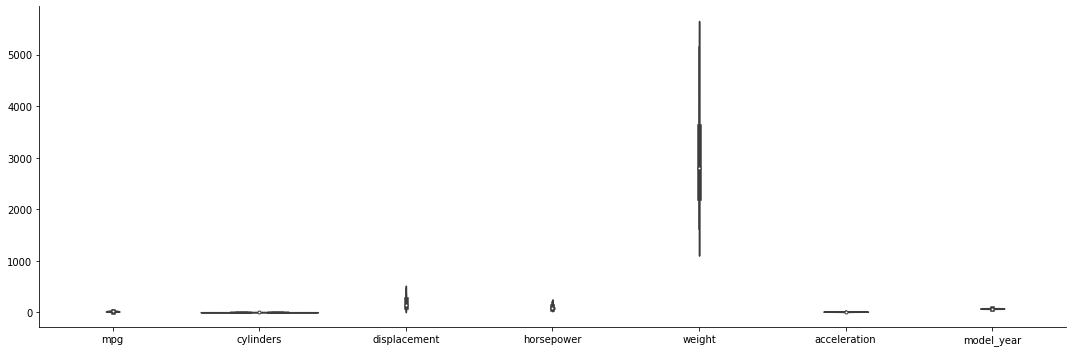

In [ ]:
# catplot 으로 violinplot그리기
# df 전체를 넣고 시각화 하기

sns.catplot(data=df, kind="violin", aspect=3)